In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data
data = pd.read_csv("D:\Lu_Git_Demo\Pythoncodespace\SVM\diabetes.csv", encoding_errors="ignore")

In [3]:
# Data Quality Checking
def quality_check(data):
    print("Data Information is :", data.info())
    print("Data Description is :", data.describe())
    print("Data columns are :", data.columns)
    print("The null counts are :", data.isnull().sum())

In [4]:
print("The Quality report of the data is as follows \n:", quality_check(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Data Information is : None
Data Description is :        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin   
count   768.000000  768.000000     768.000000     768.000000  768.000000  \
mean      3.845052  120.894531      69.

In [5]:
data["Pregnancies"].astype(object).value_counts().sort_values(ascending= False).head(10).index

Index([1, 0, 2, 3, 4, 5, 6, 7, 8, 9], dtype='object', name='Pregnancies')

In [6]:
data["Pregnancies"].astype(object).value_counts().sort_values(ascending= False).head(10).values

array([135, 111, 103,  75,  68,  57,  50,  45,  38,  28], dtype=int64)

In [7]:

index = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).index

In [8]:
def plot_categorical_data(index, values):
    plt.figure(figsize = [20,8])
    plt.subplot(1,2,1)
    plt.pie(x= values,labels = index, autopct='%1.0f%%')
    plt.subplot(1,2,2)
    sns.barplot(y = index, x = values, orient = "h")
    plt.grid();
    plt.show();

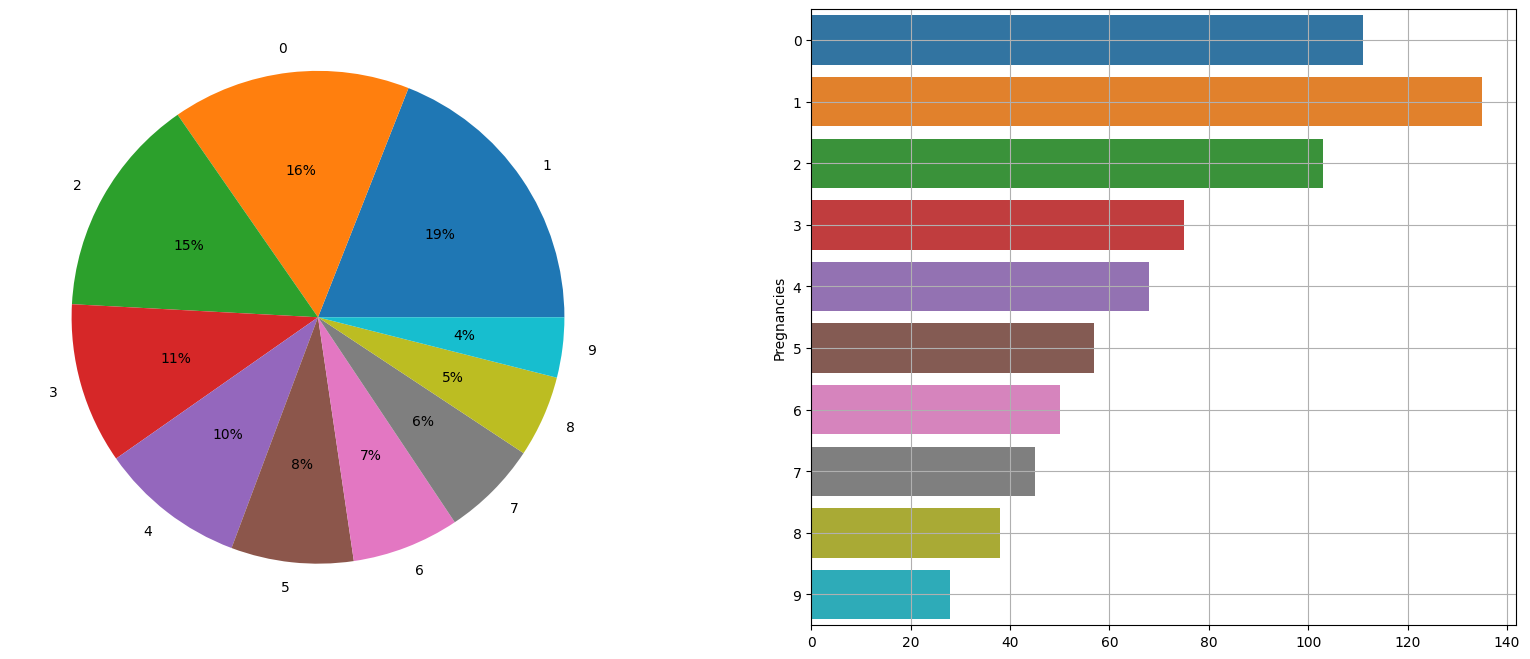

In [9]:
index = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).index
values = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).values
plot_categorical_data(index, values)

In [10]:
def plot_continious_data(data, col):
    plt.figure(figsize = [20,8])
    plt.subplot(1,2,1)
    sns.histplot(data, x = col)
    plt.subplot(1,2,2)
    sns.boxplot(y = col, data=data)
    plt.grid()
    plt.show()

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

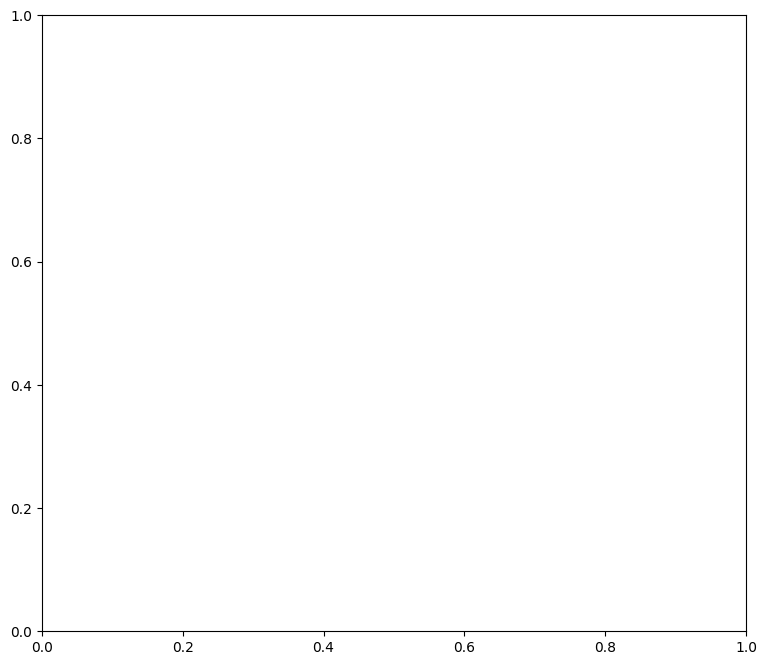

In [11]:
plot_continious_data(data, col= "Glucose")

In [ ]:
def separate_categorical_continious(data):
    categorical_features , continious_features = [] , []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_features.append(col)
        else:
            continious_features.append(col)
    return categorical_features , continious_features

def plot_categorical_data(index, values):
    plt.figure(figsize = [20,8])
    plt.subplot(1,2,1)
    plt.pie(x= values,labels = index, autopct='%1.0f%%')
    plt.subplot(1,2,2)
    sns.barplot(y = index, x = values, orient = "h")
    plt.grid();
    plt.show();

def plot_continious_data(data, col):
    plt.figure(figsize = [20,8])
    plt.subplot(1,2,1)
    sns.histplot(data, x = col)
    plt.subplot(1,2,2)
    sns.boxplot(y = col, data=data)
    plt.grid();
    plt.show();

def univariate_data_analysis(data):
    categorical_features , continious_features = separate_categorical_continious(data)
    # categorical_features = data["Pregnancies"].astype(object)
    # for col in categorical_features:
    print("Categorical Plots Done")
    index = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).index
    values = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).values
    print(plot_categorical_data(index = index, values = values))
    
    for col in continious_features:
         print(plot_continious_data(data, col))

EDA Report: 
Categorical Plots Done


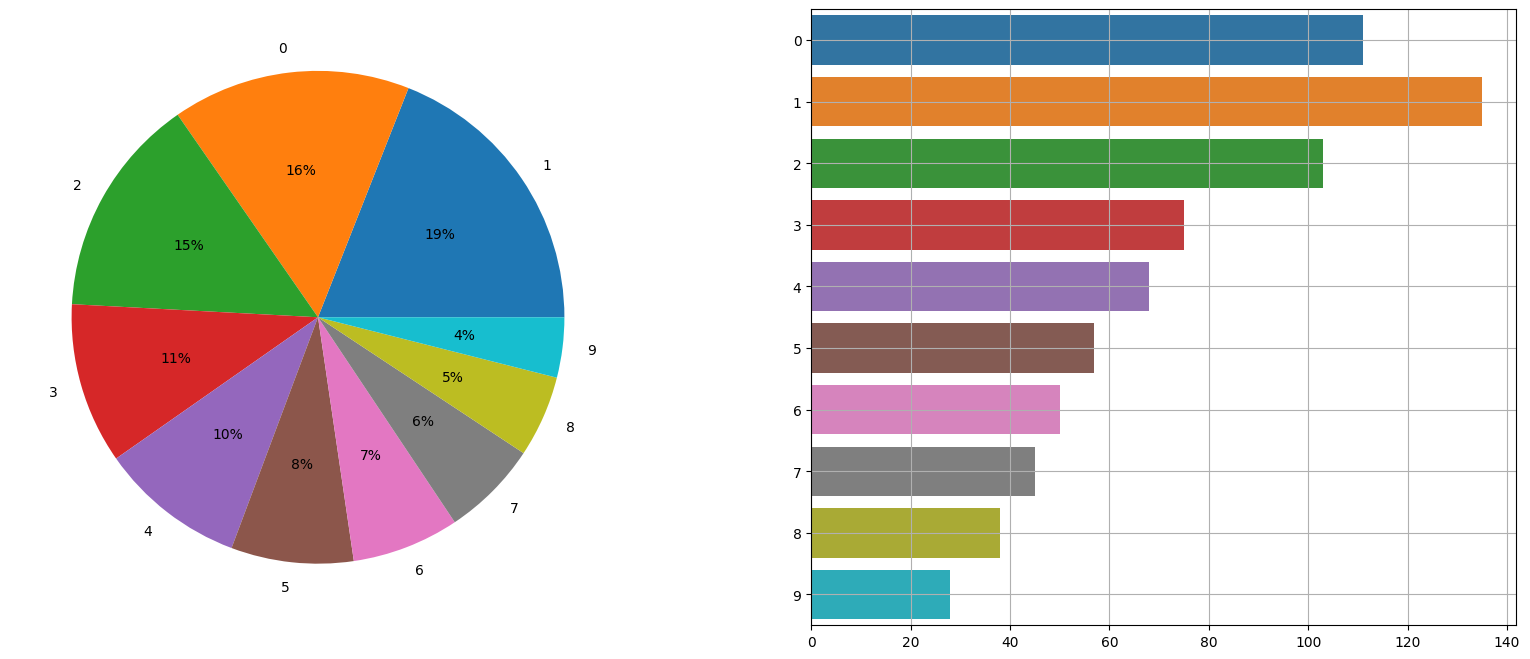

None


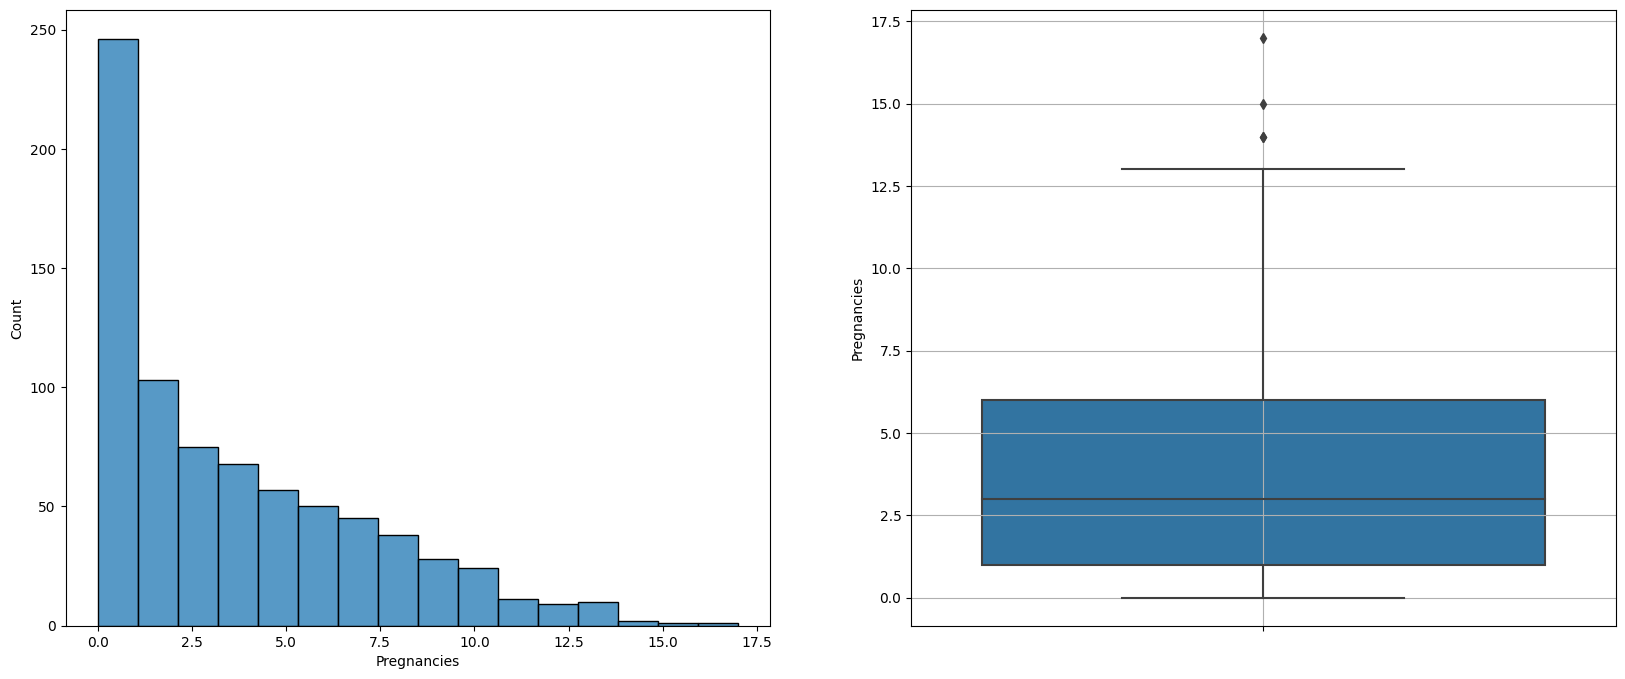

None


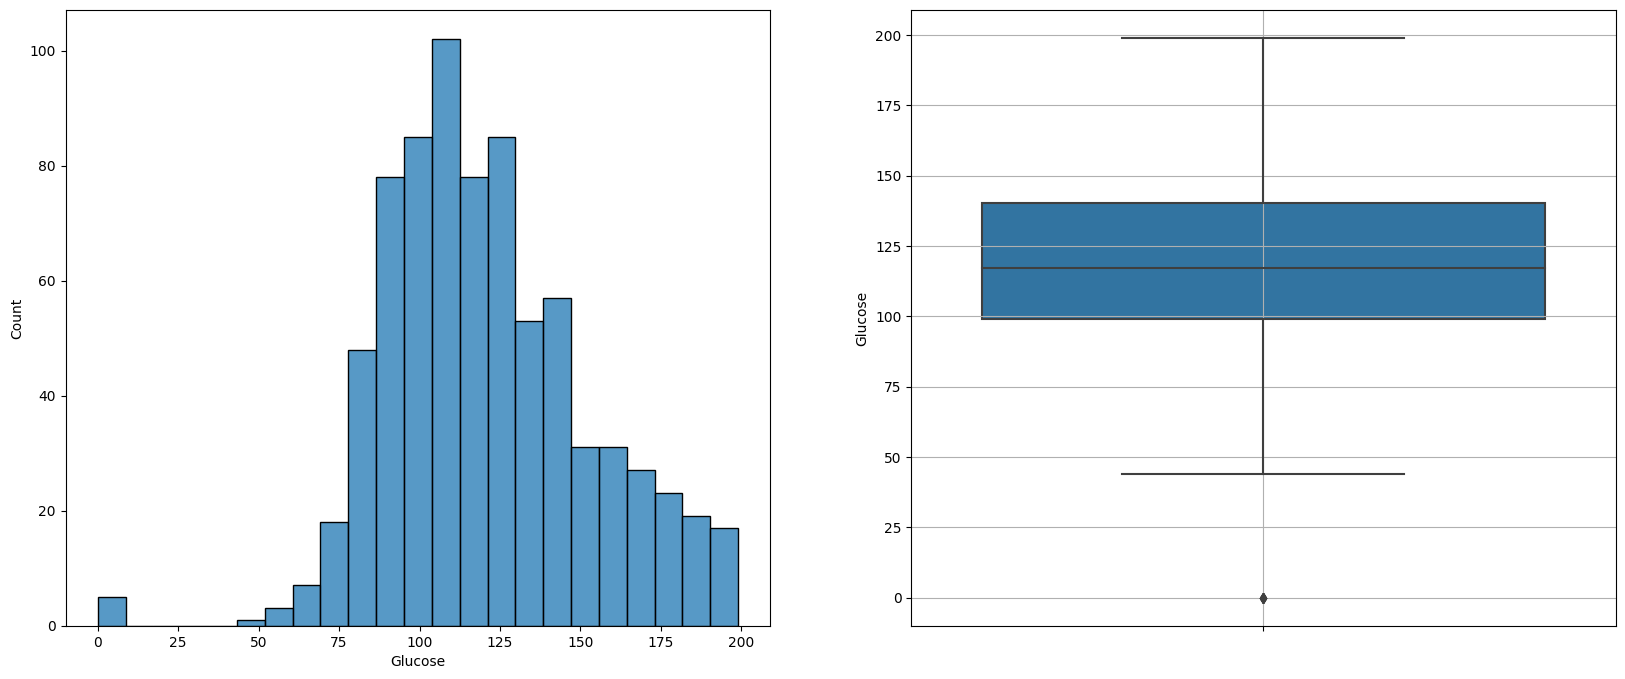

None


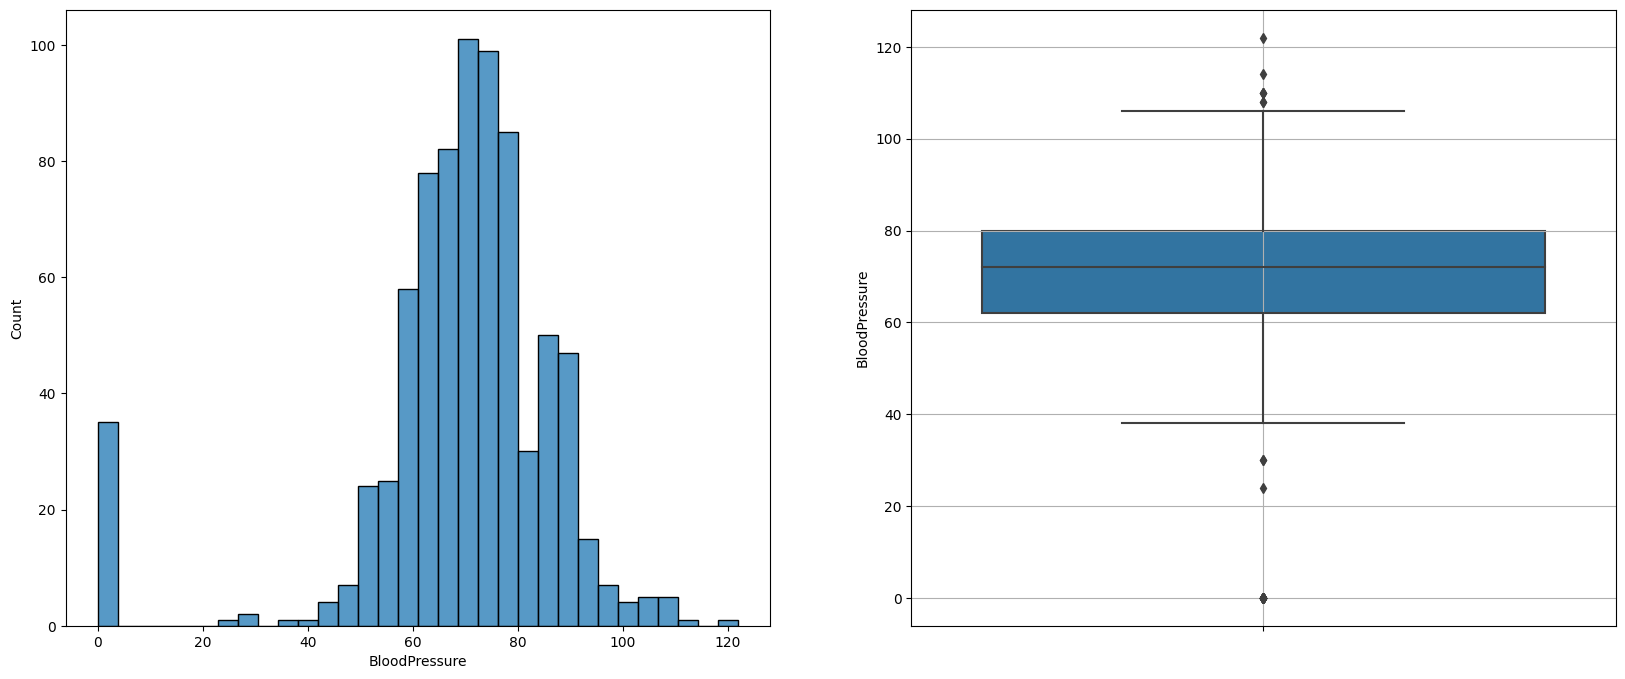

None


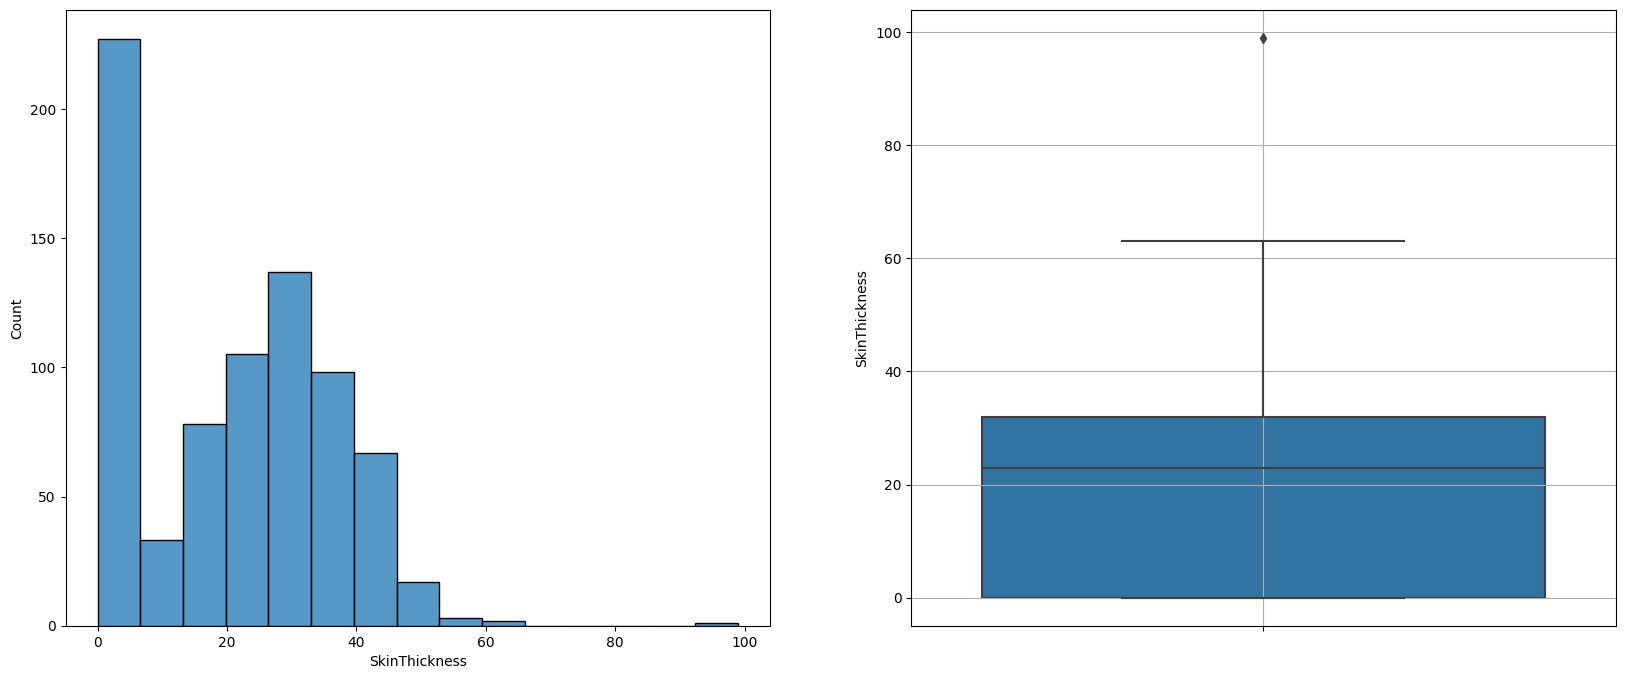

None


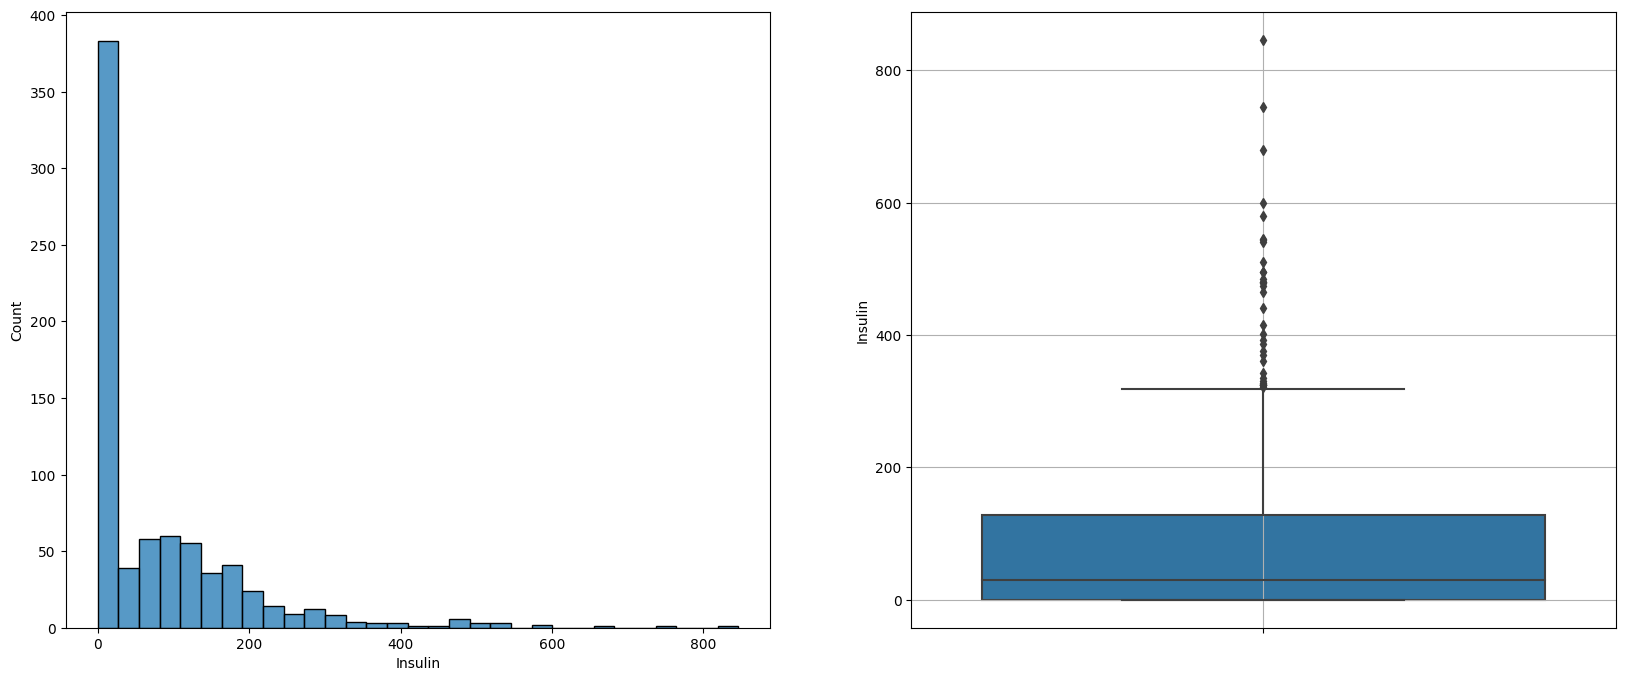

None


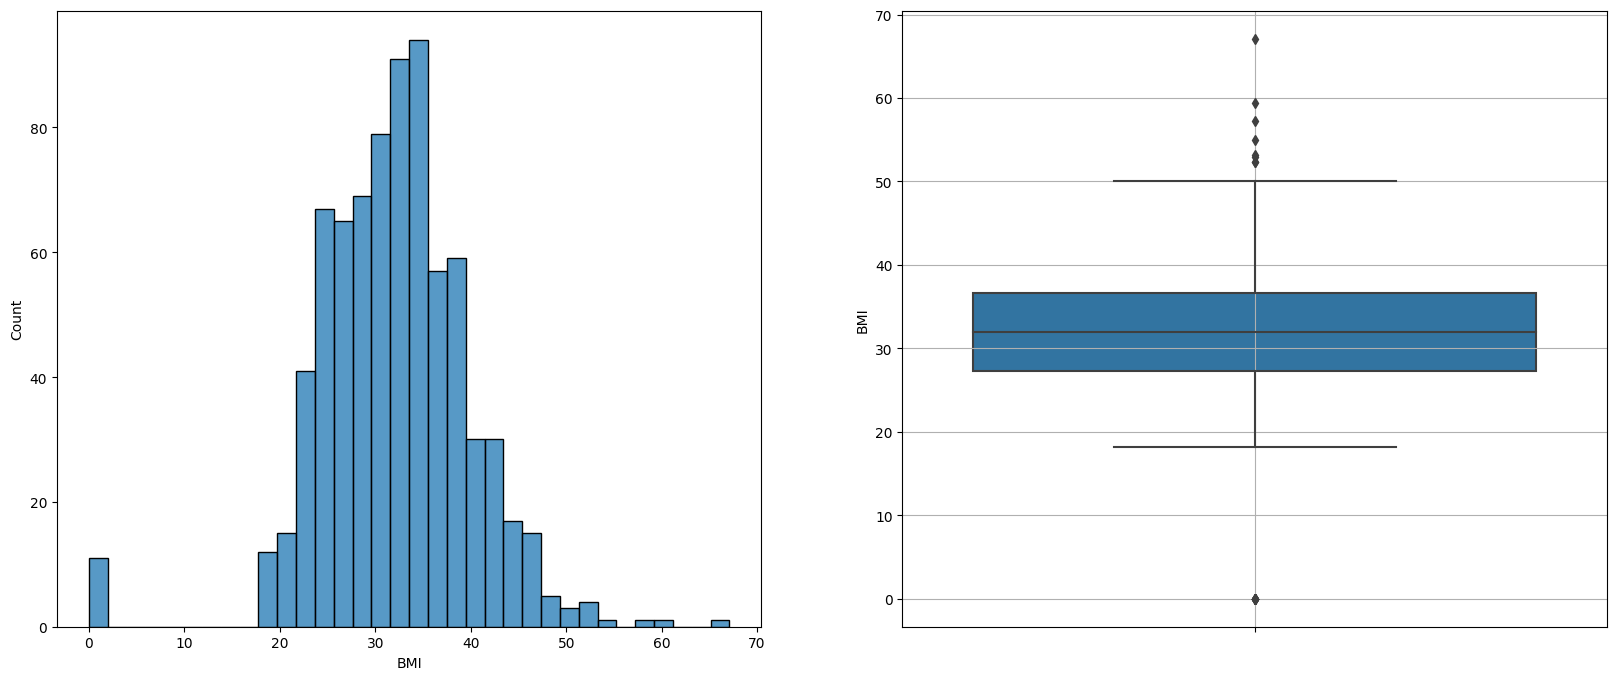

None


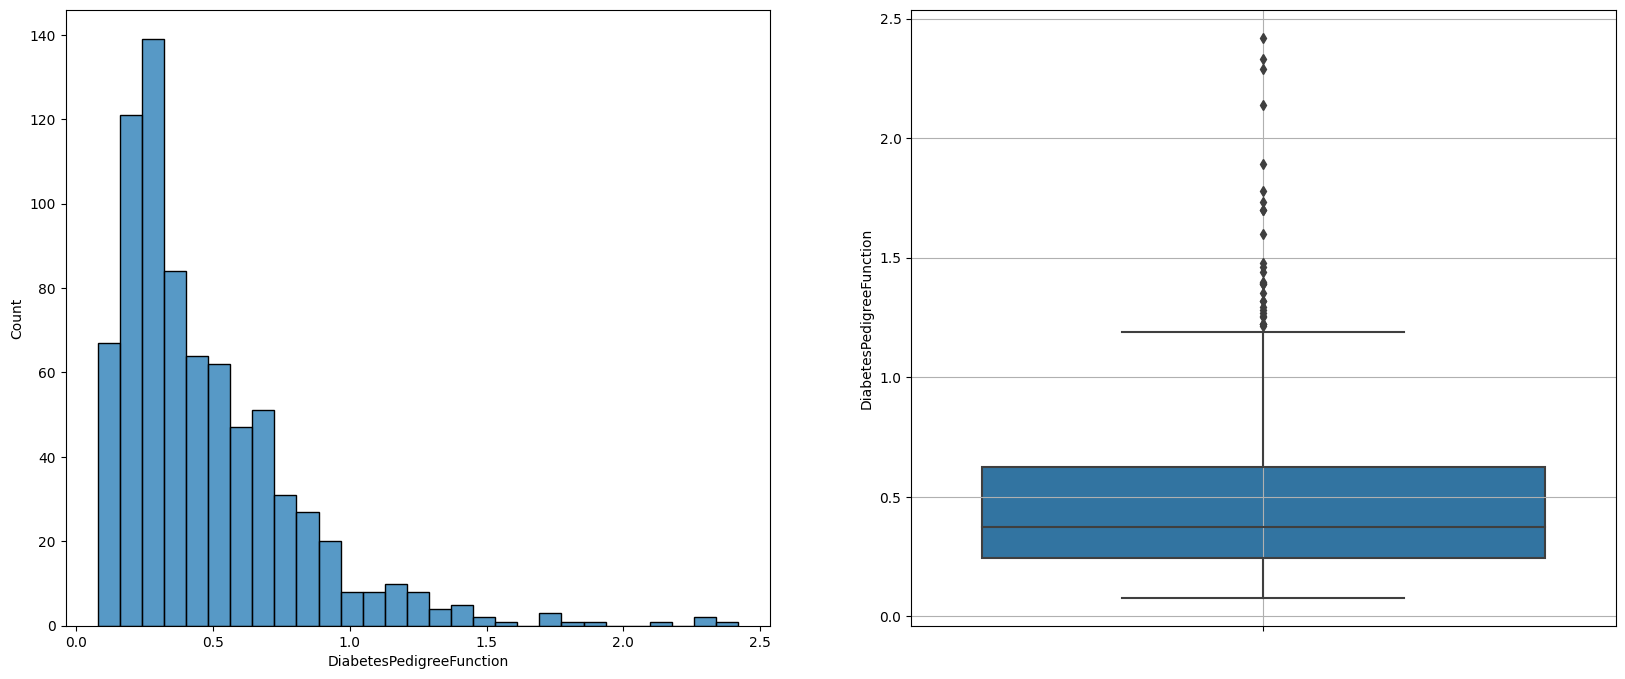

None


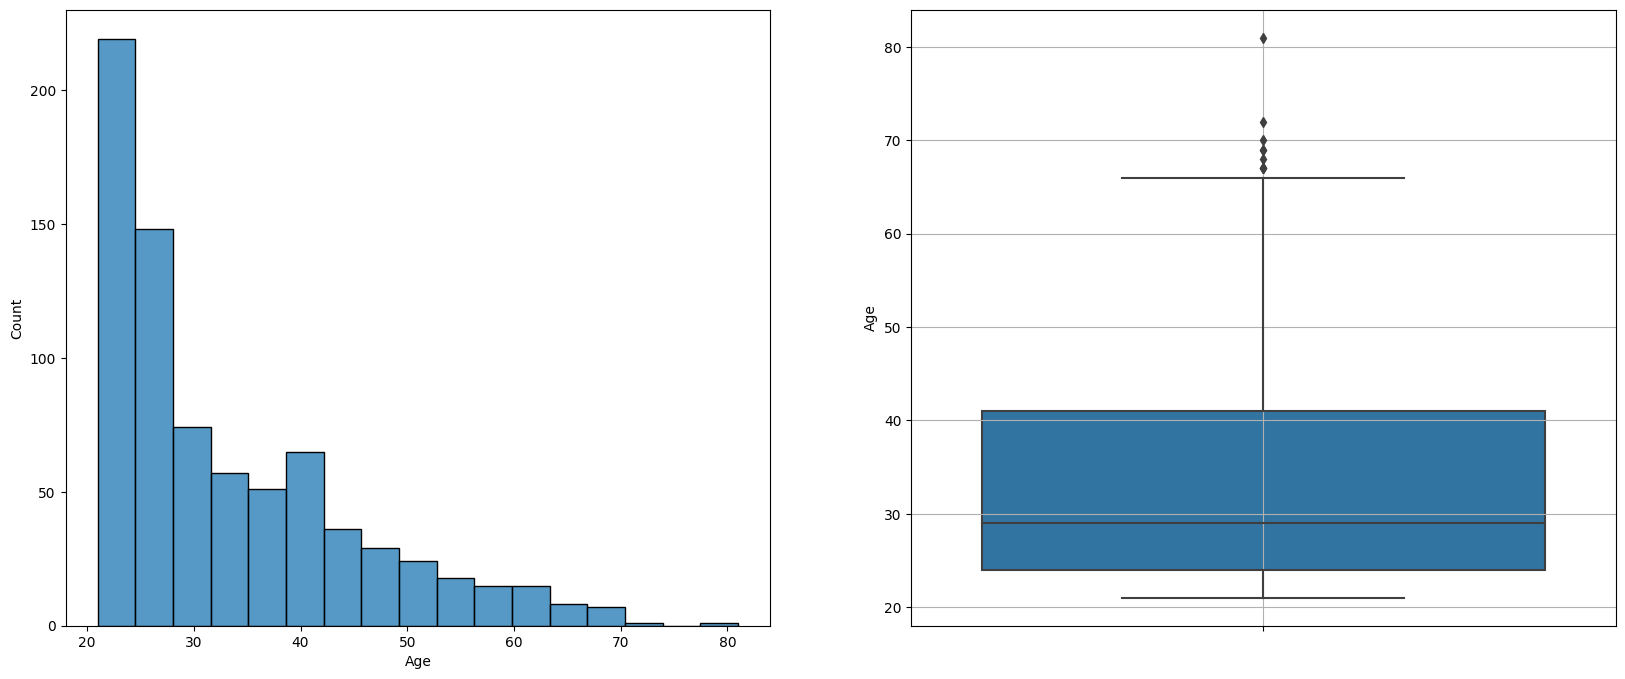

None


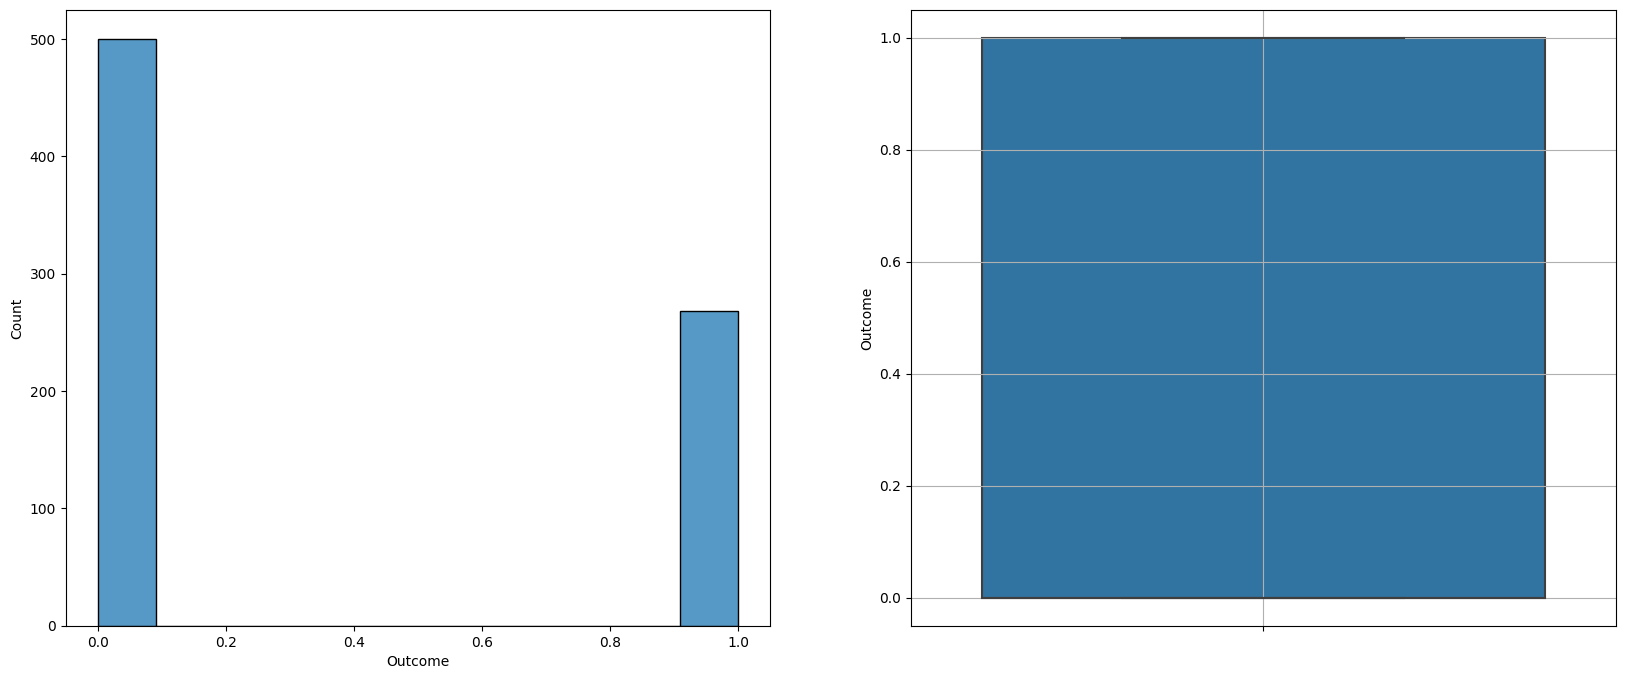

None


In [ ]:
print("EDA Report: ")
univariate_data_analysis(data)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

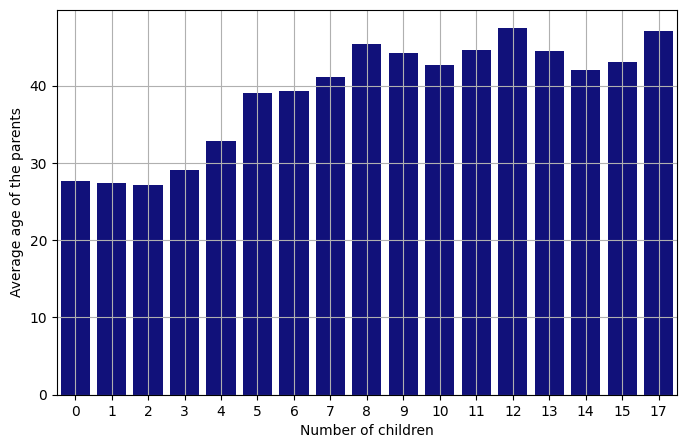

In [ ]:
number_of_children = data.groupby(by = ['Pregnancies'])['Age'].mean().index
avearage_ages = data.groupby(by = ['Pregnancies'])['Age'].mean().values
plt.figure(figsize = [8,5])
sns.barplot(x = number_of_children,y =avearage_ages, color = "darkblue")
plt.xlabel("Number of children")
plt.ylabel("Average age of the parents")
plt.grid()
plt.show();

In [ ]:
data.groupby(by = ['Outcome'])['Pregnancies'].count()

Outcome
0    500
1    268
Name: Pregnancies, dtype: int64

- There are total 500 children whose parents are reported to be non diabetic and there are 268 children whose parents have been reported to be diabetic

In [ ]:
outcome_data = data['Outcome'].astype(object)
pregnency_data = data['Pregnancies'].astype(object)

In [ ]:
data["Pregnancies_obj"] = pregnency_data
data["outcome_data"] = outcome_data

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_obj,outcome_data
0,6,148,72,35,0,33.6,0.627,50,1,6,1
1,1,85,66,29,0,26.6,0.351,31,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,8,1
3,1,89,66,23,94,28.1,0.167,21,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,1


In [ ]:
data.groupby(by = ['Pregnancies_obj','outcome_data'])['Pregnancies_obj'].count()

Pregnancies_obj  outcome_data
0                0                73
                 1                38
1                0               106
                 1                29
2                0                84
                 1                19
3                0                48
                 1                27
4                0                45
                 1                23
5                0                36
                 1                21
6                0                34
                 1                16
7                0                20
                 1                25
8                0                16
                 1                22
9                0                10
                 1                18
10               0                14
                 1                10
11               0                 4
                 1                 7
12               0                 5
                 1                 4
13      

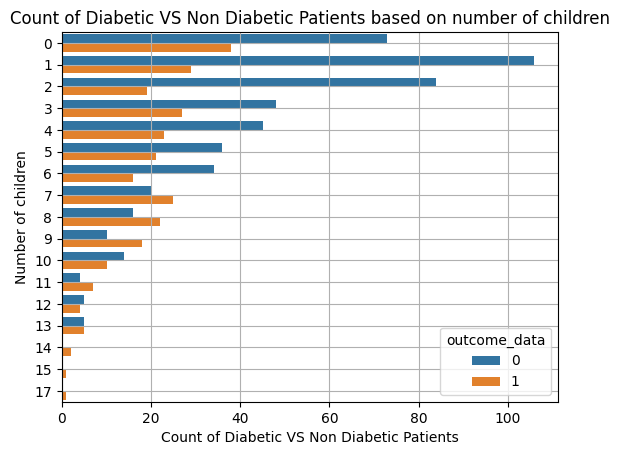

In [ ]:
sns.countplot(y = 'Pregnancies_obj', data= data , hue = 'outcome_data')
plt.ylabel("Number of children")
plt.xlabel("Count of Diabetic VS Non Diabetic Patients")
plt.title("Count of Diabetic VS Non Diabetic Patients based on number of children")
plt.grid()
plt.show();

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_obj',
       'outcome_data'],
      dtype='object')

In [ ]:
data.groupby(by = ['Pregnancies_obj','outcome_data'])['BMI'].median()

Pregnancies_obj  outcome_data
0                0               32.40
                 1               37.00
1                0               28.20
                 1               36.50
2                0               29.70
                 1               32.90
3                0               29.60
                 1               33.30
4                0               31.30
                 1               32.30
5                0               31.90
                 1               35.60
6                0               29.90
                 1               30.85
7                0               30.95
                 1               35.50
8                0               29.90
                 1               32.80
9                0               31.05
                 1               32.85
10               0               29.45
                 1               33.65
11               0               36.10
                 1               36.60
12               0               3

<Axes: xlabel='BMI', ylabel='Count'>

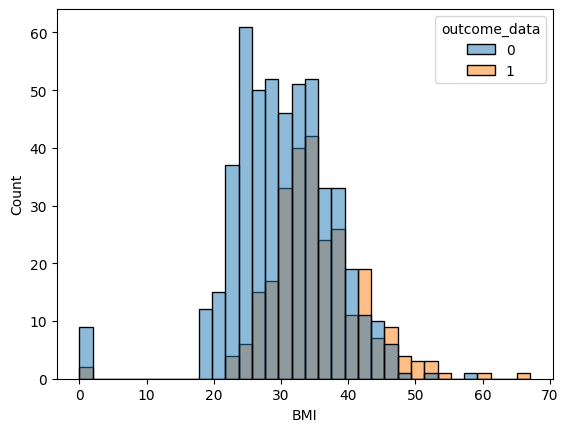

In [ ]:
sns.histplot(x = 'BMI',data=data , hue = "outcome_data")

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_obj',
       'outcome_data'],
      dtype='object')

<Axes: xlabel='Insulin', ylabel='Count'>

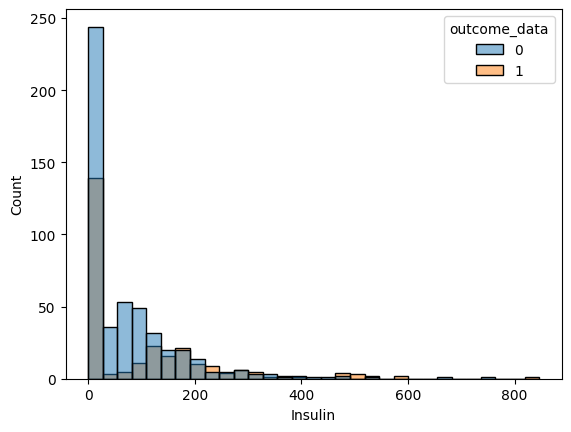

In [ ]:
sns.histplot(x = 'Insulin',data=data , hue = "outcome_data")

<Axes: xlabel='Glucose', ylabel='Count'>

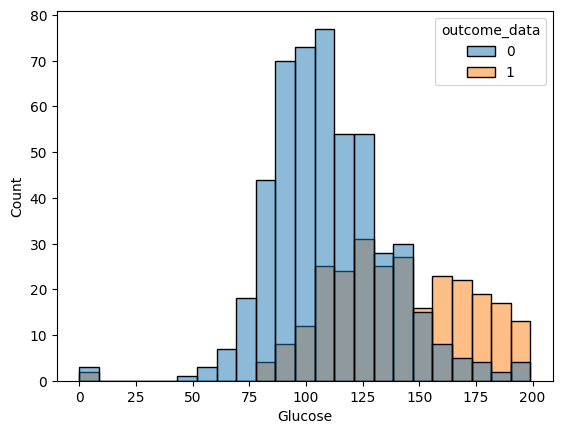

In [ ]:
sns.histplot(x = 'Glucose',data=data , hue = "outcome_data")

<Axes: xlabel='BloodPressure', ylabel='Count'>

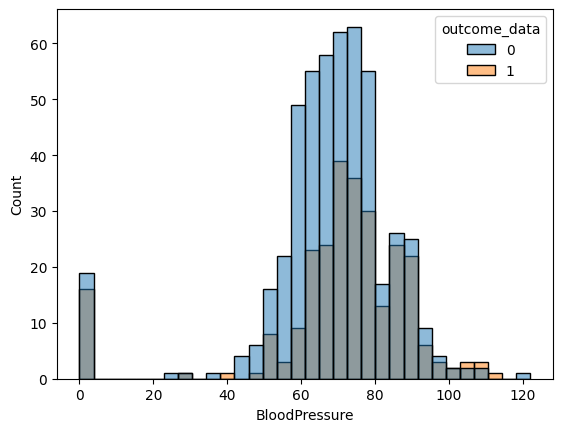

In [ ]:
sns.histplot(x = 'BloodPressure',data=data , hue = "outcome_data")

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_obj',
       'outcome_data'],
      dtype='object')

In [ ]:
data.drop(['Pregnancies_obj','outcome_data'], axis =1, inplace =  True)
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split as tts
X,y = data.drop(["Outcome"], axis =1 ), data["Outcome"]

In [ ]:
X_train,X_test,y_train,y_test = tts(X,y , test_size =  0.25)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

**Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
svc_predictions = model_svc.predict(X_test)

In [ ]:
svc_predictions.shape

(192,)

In [ ]:
svc_predictions_train = model_svc.predict(X_train)
accuracy_score(y_train,svc_predictions_train)*100

76.38888888888889

In [ ]:
accuracy_score(y_test,svc_predictions)*100

78.125